<div style="color:Blue;background-color:yellow;padding:0.5%;font-size:3rem;text-align:center">Vaccination Classification with-LR-DT-RF-and-SVM-82.5% AUC</div>
<div style="color:blue; background-color:yellow; font-size:20px; text-align:center;">Soumyadeep Ganguly</div>
<div style="color:blue; background-color:yellow; font-size:20px; padding-bottom:10px; text-align:center;">soumyadeepganguly1922@gmail.com</div>

In [175]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
matplotlib.rcParams.update({'font.size': 15})

plt.style.use("dark_background")

In [176]:
df = pd.read_csv("datasets/h1n1_vaccine_prediction.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [177]:
df.shape

(26707, 34)

## **Dropping features**

 ##### "unique_id", "qualification",
 ##### "age_bracket", "income_level",
 ##### "marital_status", "housing_status",
 ##### "employment", "race",
 ##### "census_msa", "has_health_insur",
 ##### "no_of_adults", "no_of_children" 

In [178]:
df = df.drop(["unique_id", "qualification", "age_bracket", "income_level", "marital_status", "housing_status", "employment", "race", "census_msa", "has_health_insur", "no_of_adults", "no_of_children"], axis=1)

In [179]:
df.shape

(26707, 22)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [181]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,Female,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,Male,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,Male,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,Female,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,Female,0


In [182]:
df['sex'] = df['sex'].replace(["Female", "Male"], [0,1])

## **Dealing with NaN**

In [183]:
cl_list = ['antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker']

In [184]:
for i in cl_list:
    df[i] = df[i].replace("NaN",0)
    df[i] = df[i].fillna(0)
    print(f"{i} : replaced .....")

antiviral_medication : replaced .....
contact_avoidance : replaced .....
bought_face_mask : replaced .....
wash_hands_frequently : replaced .....
avoid_large_gatherings : replaced .....
reduced_outside_home_cont : replaced .....
avoid_touch_face : replaced .....
dr_recc_h1n1_vacc : replaced .....
dr_recc_seasonal_vacc : replaced .....
chronic_medic_condition : replaced .....
cont_child_undr_6_mnths : replaced .....
is_health_worker : replaced .....


In [185]:
df['h1n1_worry']= df['h1n1_worry'].replace("NaN",2)
df['h1n1_worry']= df['h1n1_worry'].fillna(2)

df['h1n1_awareness']= df['h1n1_awareness'].replace("NaN",1)
df['h1n1_awareness']= df['h1n1_awareness'].fillna(1)

df['is_h1n1_vacc_effective']= df['is_h1n1_vacc_effective'].replace("NaN",3)
df['is_h1n1_vacc_effective']= df['is_h1n1_vacc_effective'].fillna(3)

df['is_h1n1_risky']= df['is_h1n1_risky'].replace("NaN",3)
df['is_h1n1_risky']= df['is_h1n1_risky'].fillna(3)

df['sick_from_h1n1_vacc']= df['sick_from_h1n1_vacc'].replace("NaN",3)
df['sick_from_h1n1_vacc']= df['sick_from_h1n1_vacc'].fillna(3)

df['is_seas_vacc_effective']= df['is_seas_vacc_effective'].replace("NaN",3)
df['is_seas_vacc_effective']= df['is_seas_vacc_effective'].fillna(3)

df['is_seas_risky']= df['is_seas_risky'].replace("NaN",3)
df['is_seas_risky']= df['is_seas_risky'].fillna(3)

df['sick_from_seas_vacc']= df['sick_from_seas_vacc'].replace("NaN",3)
df['sick_from_seas_vacc']= df['sick_from_seas_vacc'].fillna(3)

df.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
sex                          0
h1n1_vaccine                 0
dtype: int64

In [186]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,0,0


<AxesSubplot: xlabel='h1n1_worry', ylabel='count'>

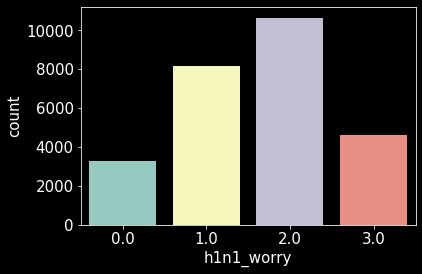

In [187]:
sns.countplot(x="h1n1_worry", data=df)

In [188]:
cl_list = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'sex']

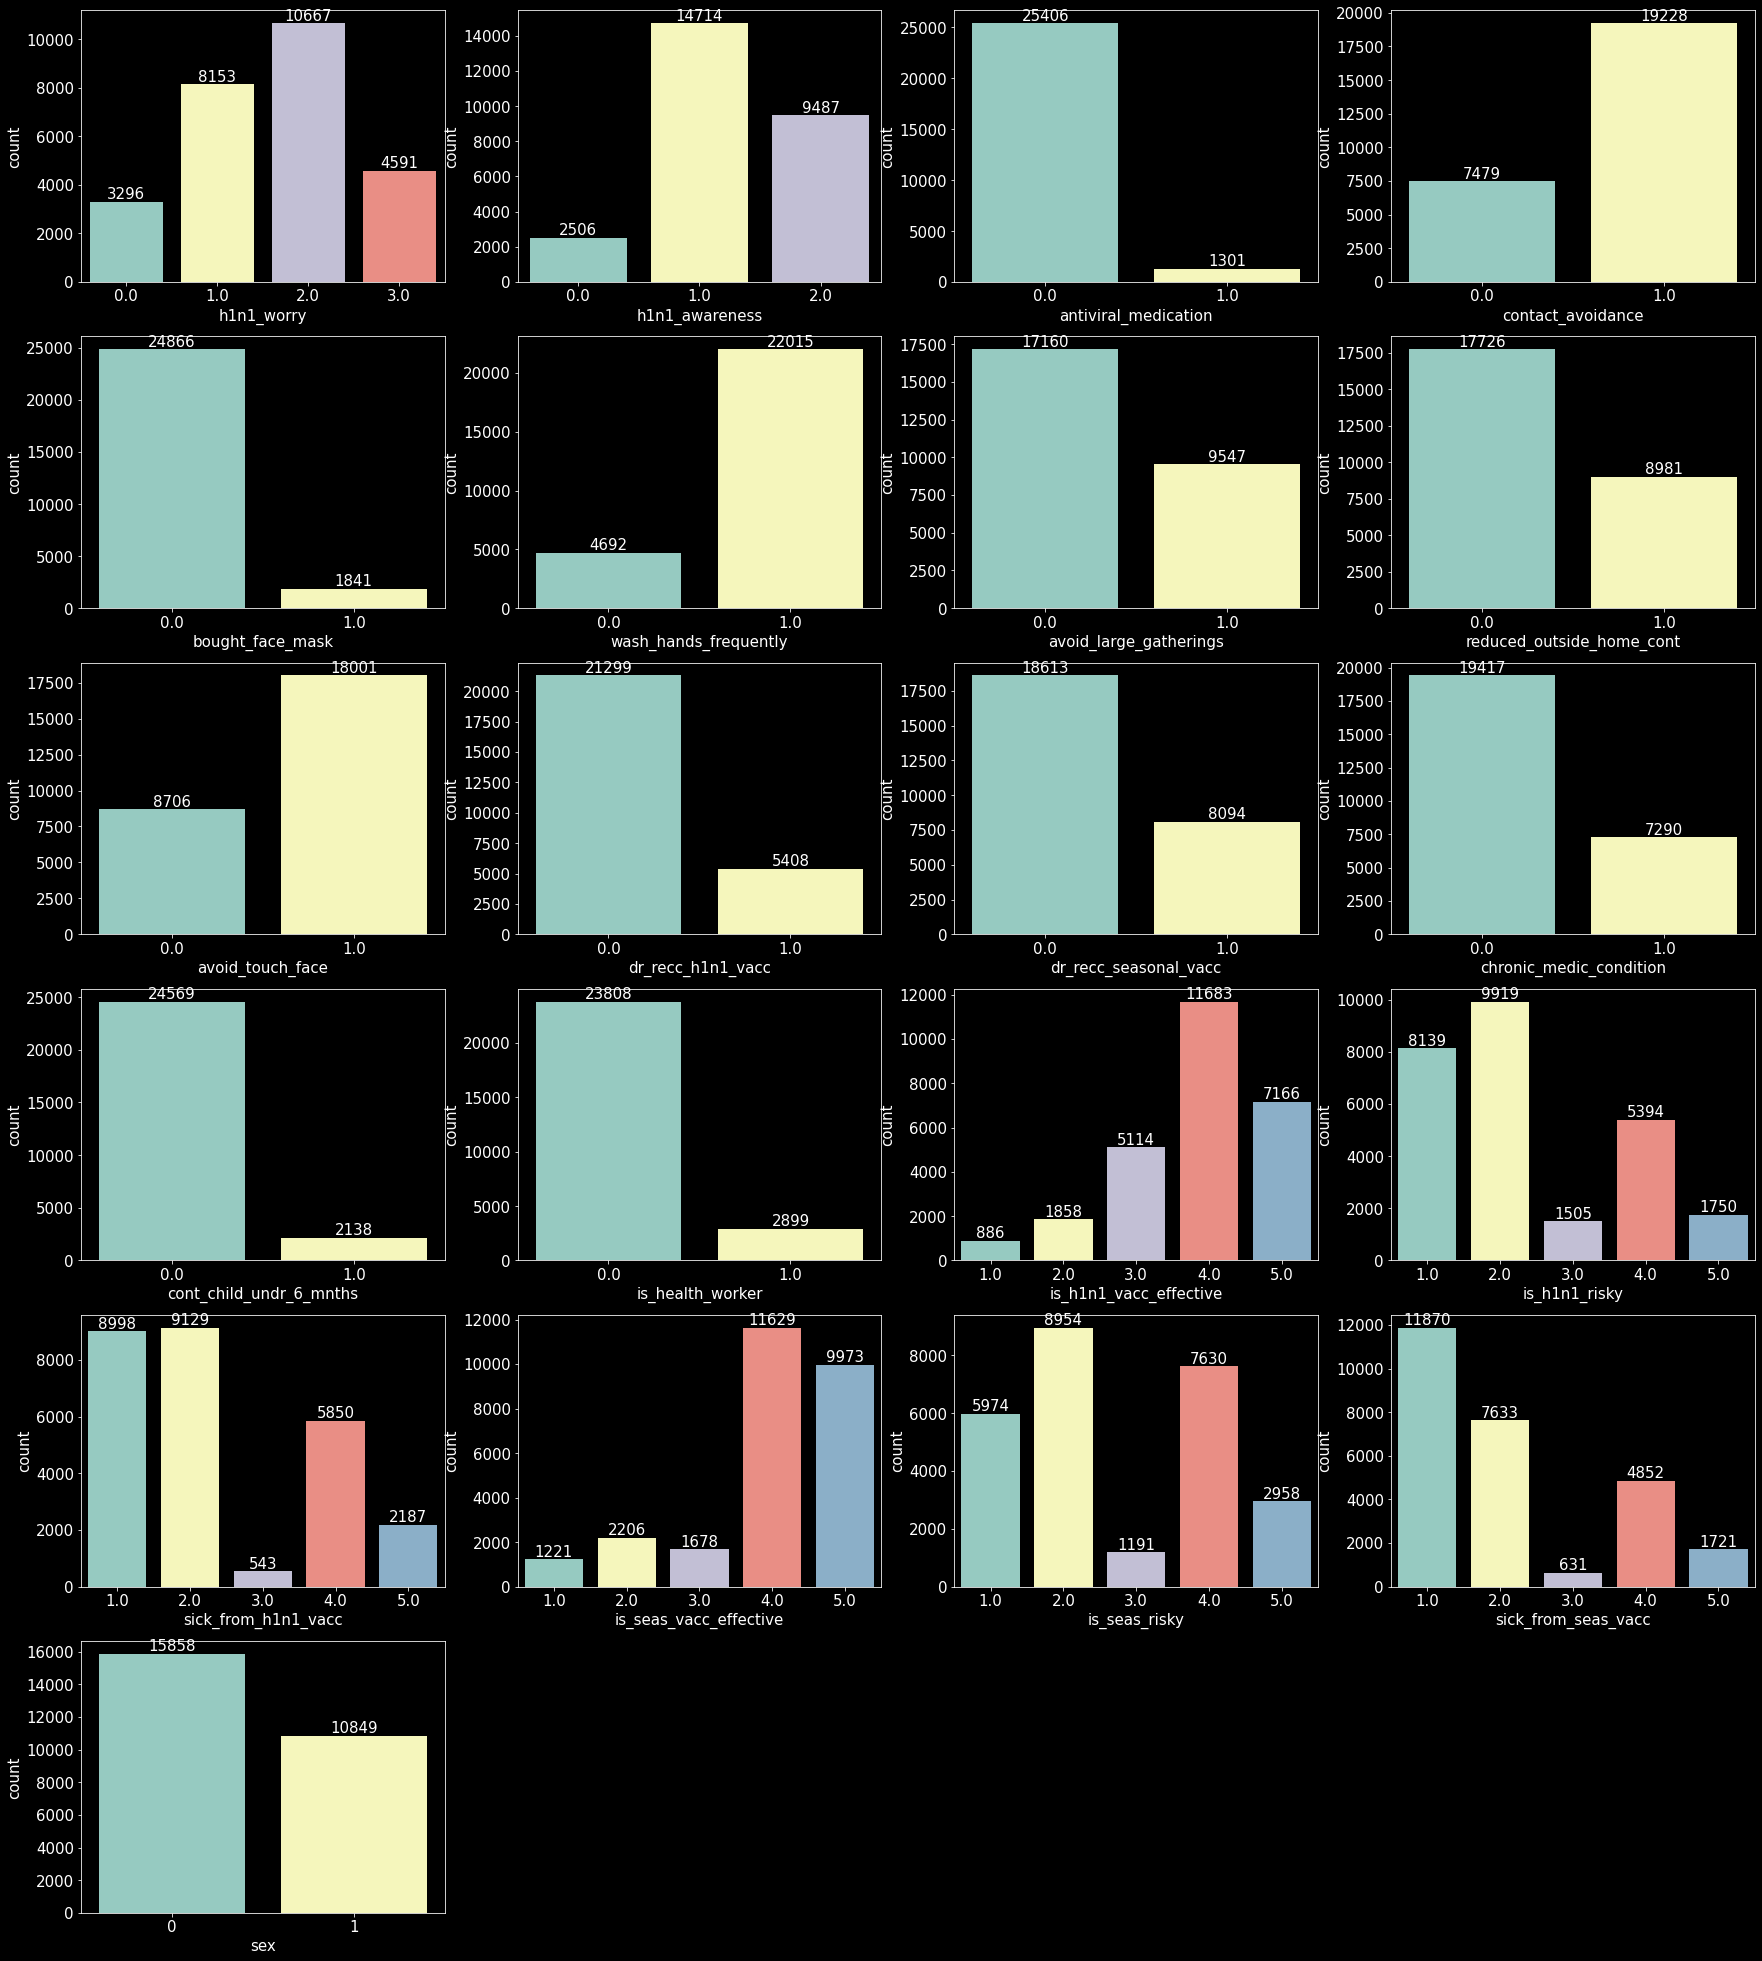

In [189]:
plt.figure(figsize=(30,35))
for i in range(len(cl_list)):
    
    ax = plt.subplot(6, 4, i+1)
    sns.countplot(x=cl_list[i], data=df)
    ax.bar_label(ax.containers[0])


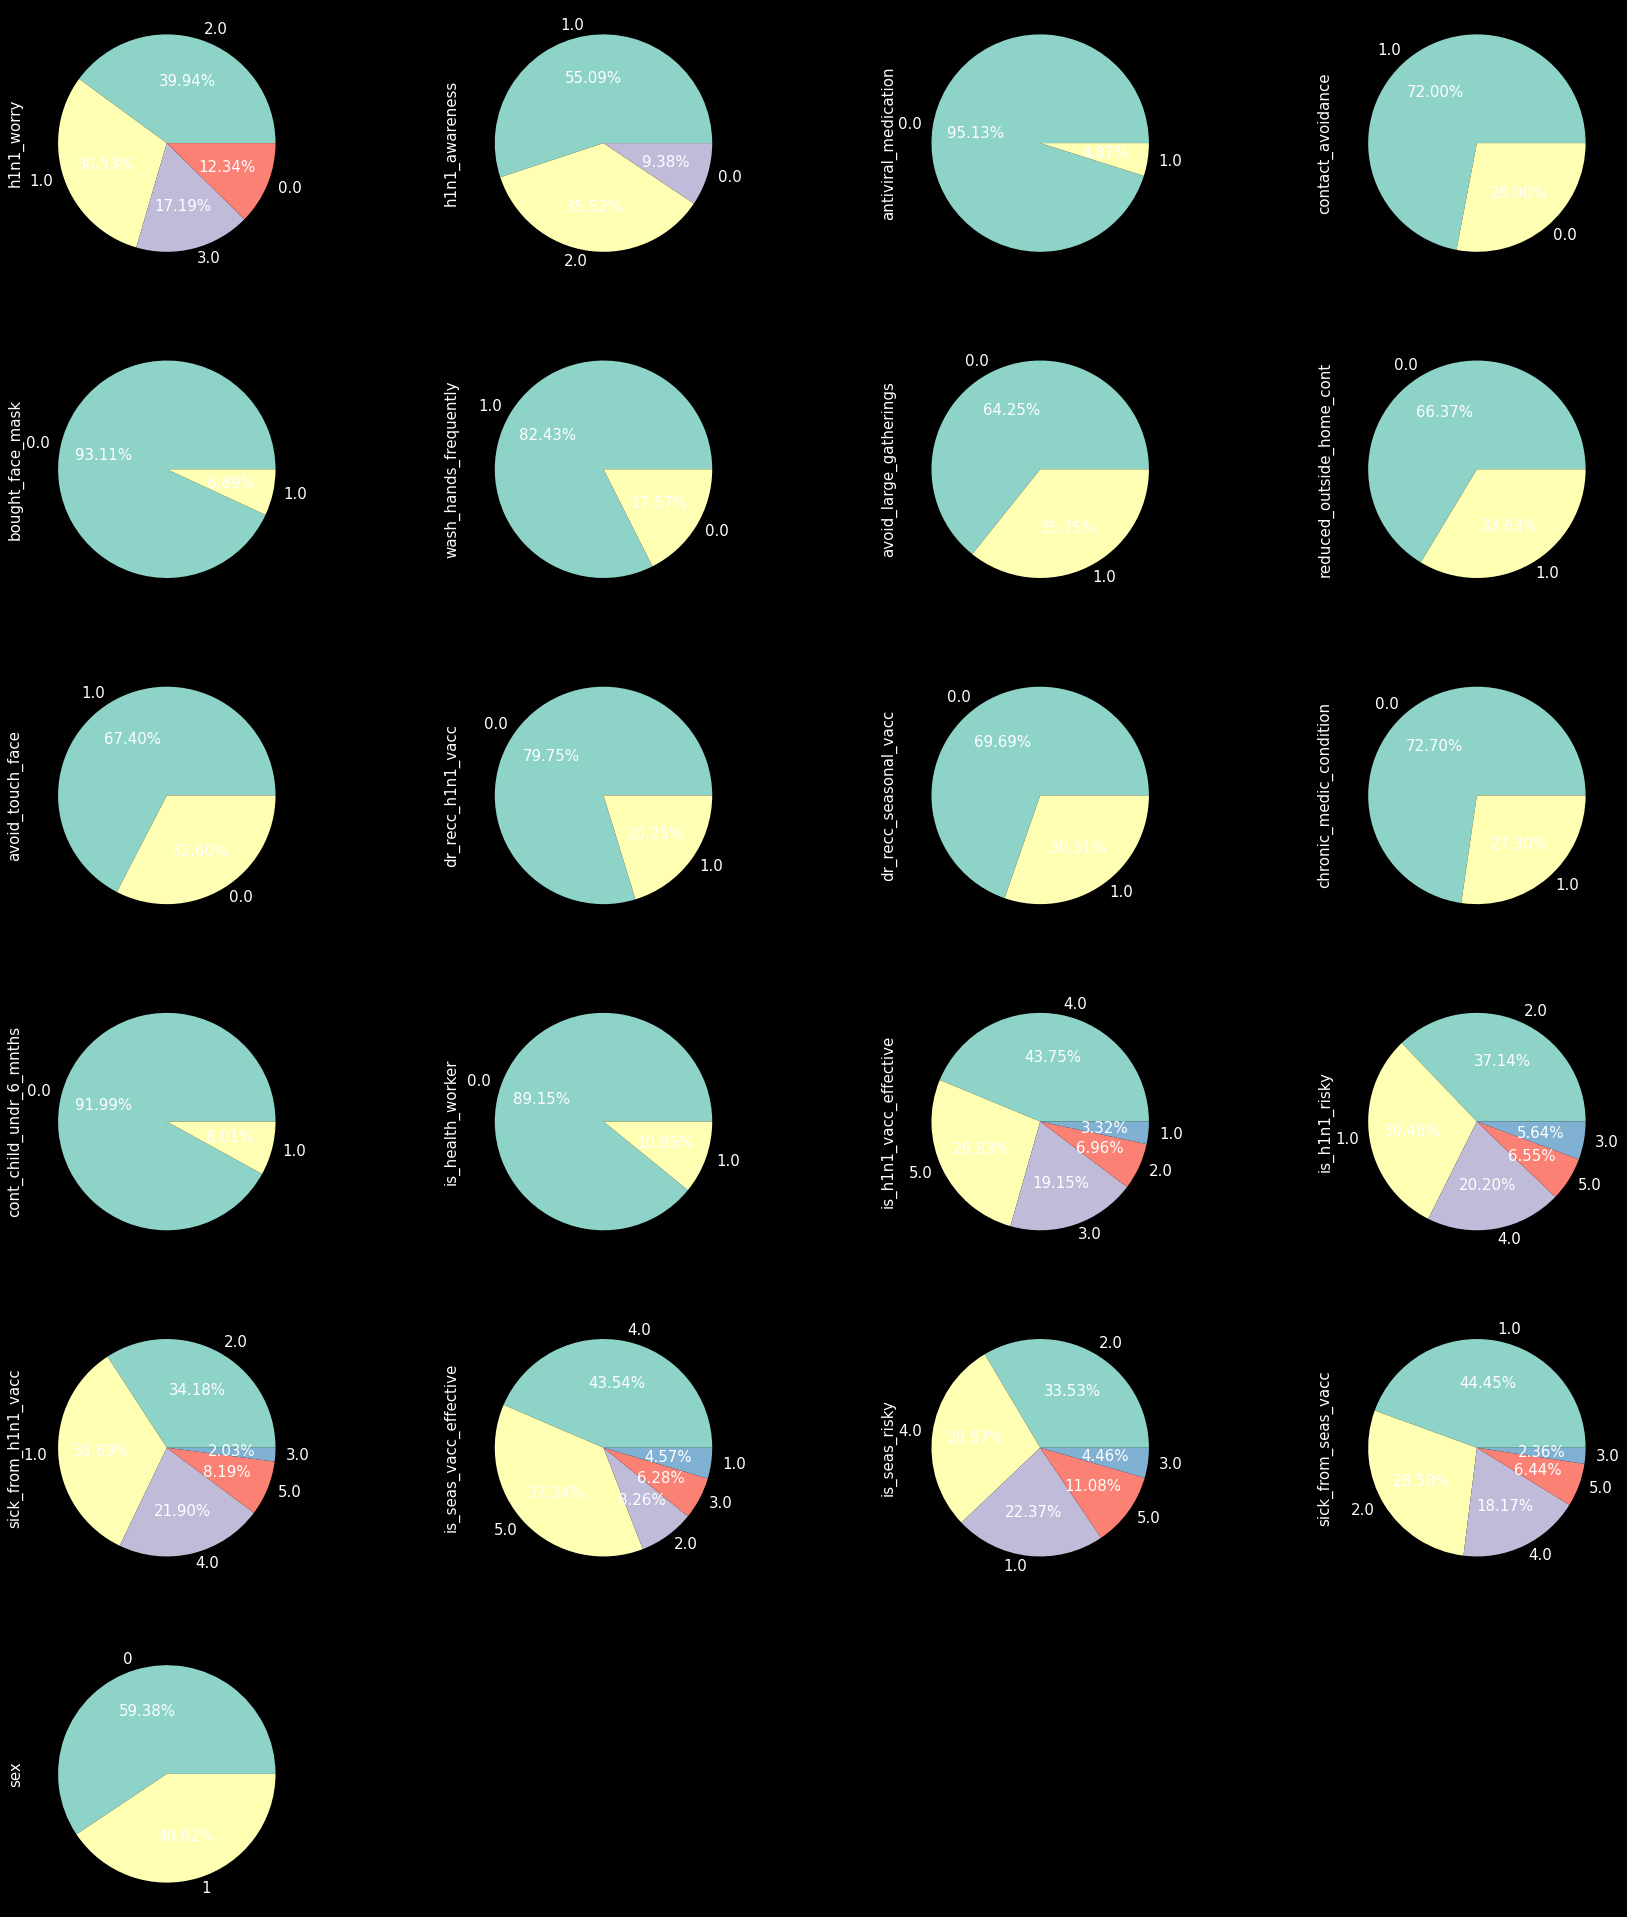

In [190]:
plt.figure(figsize=(30,35))
for i in range(len(cl_list)):
    plt.subplot(6, 4, i+1)
    df[cl_list[i]].value_counts().plot.pie(autopct='%1.2f%%')
    # ax.bar_label(ax.containers[0])

In [191]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.719961,0.068933,0.824316,0.357472,0.336279,0.674018,0.202494,0.303067,0.272962,0.080054,0.108548,3.838170,2.352117,2.367170,4.008238,2.724567,2.135845,0.406223,0.212454
std,0.909016,0.617047,0.215273,0.449026,0.253345,0.380558,0.479264,0.472444,0.468749,0.401866,0.459592,0.445490,0.271382,0.311077,1.005239,1.278589,1.354871,1.085401,1.372204,1.325275,0.491136,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


# **Normalizing Data**

In [192]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
data_minmax_scaled = min_max_scaler.fit_transform(df)

df = pd.DataFrame(data_minmax_scaled, columns=df.columns)


In [193]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,0.539933,0.630696,0.048714,0.719961,0.068933,0.824316,0.357472,0.336279,0.674018,0.202494,0.303067,0.272962,0.080054,0.108548,0.709542,0.338029,0.341792,0.752059,0.431142,0.283961,0.406223,0.212454
std,0.303005,0.308523,0.215273,0.449026,0.253345,0.380558,0.479264,0.472444,0.468749,0.401866,0.459592,0.445490,0.271382,0.311077,0.251310,0.319647,0.338718,0.271350,0.343051,0.331319,0.491136,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000
50%,0.666667,0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.250000,0.750000,0.250000,0.250000,0.000000,0.000000
75%,0.666667,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.750000,0.750000,1.000000,0.750000,0.500000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data Splitting**

In [194]:
X = df.drop(["h1n1_vaccine"], axis=1)
y = df["h1n1_vaccine"]

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Logistic Regression**

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [197]:
y_pred = lr.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 82.4784724822164


# **Decision Tree**

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [199]:
dt_y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, dt_y_pred)
print("Decision Tree model accuracy (in %):", acc*100)

Decision Tree model accuracy (in %): 82.42231374017221


# **Random-Forest**

In [200]:
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [201]:
rf_y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, rf_y_pred)
print("Random Forest model accuracy (in %):", acc*100)

Random Forest model accuracy (in %): 80.75627105952826


# **Support Vector Machine**

In [202]:
from sklearn.svm import SVC
svc = SVC(kernel="poly")
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [203]:
svc_y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, svc_y_pred)
print("Support Vector Classifier accuracy (in %):", acc*100)

Support Vector Classifier accuracy (in %): 82.98390116061401
